In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cctv_seoul = pd.read_csv('c:/py_data/CCTV_in_Seoul.csv', encoding = 'euc-kr')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
pop_seoul = pd.read_csv('c:/py_data/population_in_Seoul.csv', encoding = 'cp949')
pop_seoul.head()

,자치구,세대,합계_계,합계_남자,합계_여자,한국인_계,한국인_남자,한국인_여자,등록외국인_계,등록외국인_남자,등록외국인_여자,65세이상고령자
0,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,1321458
1,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,25425
2,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,20764
3,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,36231
4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,39997


In [10]:
pop_seoul = pop_seoul[['자치구', '합계_계','한국인_계','등록외국인_계','65세이상고령자']]
pop_seoul.head()

,자치구,합계_계,한국인_계,등록외국인_계,65세이상고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


In [13]:
# cctv_seoul의 컬럼 '기관명'을 '구별'로 변경하려면 ?
cctv_seoul.rename(columns={'기관명':'구별'}, inplace = True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [15]:
# cctv_seoul df를 소계 중심으로 데이터 정렬(오름차순)
# 정렬할 결과는 유지하지 말 것
cctv_seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [16]:
cctv_seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [17]:
# cctv_seoul 필드 추가
# '최근증가율' 필드 추가 (2014+2015+2016)/~ 2013(*100)
cctv_seoul['최근증가율'] = (cctv_seoul['2014년'] +cctv_seoul['2015년'] + cctv_seoul['2016년']) / cctv_seoul['2013년도 이전']*100
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [18]:
pop_seoul.head()

,자치구,합계_계,한국인_계,등록외국인_계,65세이상고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


In [34]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
                          pop_seoul.columns[1]:'인구수',
                          pop_seoul.columns[2]:'내국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자'}, inplace=True)
pop_seoul.head()

,구별,인구수,내국인,외국인,고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


In [36]:
# pop_seoul에 필드 추가 '외국인비율','내국인비율','고령자비율'
pop_seoul['외국인비율'] = pop_seoul['외국인']/pop_seoul['인구수'] * 100
pop_seoul['내국인비율'] = pop_seoul['내국인']/pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자']/pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,내국인비율,고령자비율
0,합계,10197604,9926968,270636,1321458,2.653918,97.346082,12.958515
1,종로구,162820,153589,9231,25425,5.669451,94.330549,15.615404
2,중구,133240,124312,8928,20764,6.700690,93.299310,15.583909
3,용산구,244203,229456,14747,36231,6.038828,93.961172,14.836427
4,성동구,311244,303380,7864,39997,2.526635,97.473365,12.850689


In [38]:
data_seoul = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,내국인,외국인,고령자,외국인비율,내국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500,565550,4950,63167,0.867660,99.132340,11.072217
1,강동구,773,379,99,155,377,166.490765,453233,449019,4214,54622,0.929765,99.070235,12.051638
2,강북구,748,369,120,138,204,125.203252,330192,326686,3506,54813,1.061806,98.938194,16.600342
3,강서구,884,388,258,184,81,134.793814,603772,597248,6524,72548,1.080540,98.919460,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515,507203,18312,68082,3.484582,96.515418,12.955291


In [39]:
pop_seoul.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,내국인비율,고령자비율
0,합계,10197604,9926968,270636,1321458,2.653918,97.346082,12.958515
1,종로구,162820,153589,9231,25425,5.669451,94.330549,15.615404
2,중구,133240,124312,8928,20764,6.700690,93.299310,15.583909
3,용산구,244203,229456,14747,36231,6.038828,93.961172,14.836427
4,성동구,311244,303380,7864,39997,2.526635,97.473365,12.850689


In [40]:
# 특정 인덱스 삭제 명령
pop_seoul.drop([0], inplace=True)  # 데이터프레임.drop([인덱스번호])
pop_seoul.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,내국인비율,고령자비율
1,종로구,162820,153589,9231,25425,5.669451,94.330549,15.615404
2,중구,133240,124312,8928,20764,6.700690,93.299310,15.583909
3,용산구,244203,229456,14747,36231,6.038828,93.961172,14.836427
4,성동구,311244,303380,7864,39997,2.526635,97.473365,12.850689
5,광진구,372164,357211,14953,42214,4.017852,95.982148,11.342849


In [41]:
cctv_seoul[cctv_seoul['2013년도 이전'] < 500]

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
19,영등포구,904,495,214,195,373,157.979798
22,종로구,1002,464,314,211,630,248.922414
23,중구,671,413,190,72,348,147.699758


In [42]:
cctv_seoul[cctv_seoul['소계'] == 1002]

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414


In [43]:
data_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,내국인,외국인,고령자,외국인비율,내국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500,565550,4950,63167,0.867660,99.132340,11.072217
1,강동구,773,379,99,155,377,166.490765,453233,449019,4214,54622,0.929765,99.070235,12.051638
2,강북구,748,369,120,138,204,125.203252,330192,326686,3506,54813,1.061806,98.938194,16.600342
3,강서구,884,388,258,184,81,134.793814,603772,597248,6524,72548,1.080540,98.919460,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515,507203,18312,68082,3.484582,96.515418,12.955291


In [56]:
del data_seoul['2016년']

In [48]:
data_seoul.sort_values(by='인구수',
                      ascending=False,
                      inplace = True)
data_seoul.head()

,구별,소계,2014년,2015년,2016년,최근증가율,인구수,내국인,외국인,고령자,외국인비율,내국인비율,고령자비율
17,송파구,618,21,68,463,104.347826,667483,660584,6899,72506,1.033584,98.966416,10.862599
3,강서구,884,258,184,81,134.793814,603772,597248,6524,72548,1.080540,98.919460,12.015794
0,강남구,2780,430,584,932,150.619195,570500,565550,4950,63167,0.867660,99.132340,11.072217
8,노원구,1265,57,451,516,188.929889,569384,565565,3819,71941,0.670725,99.329275,12.634883
4,관악구,1496,260,390,613,149.290780,525515,507203,18312,68082,3.484582,96.515418,12.955291


In [51]:
# 인덱스 재설정하기
data_seoul.reset_index(inplace=True)
data_seoul.head()

,index,구별,소계,2014년,2015년,2016년,최근증가율,인구수,내국인,외국인,고령자,외국인비율,내국인비율,고령자비율
0,17,송파구,618,21,68,463,104.347826,667483,660584,6899,72506,1.033584,98.966416,10.862599
1,3,강서구,884,258,184,81,134.793814,603772,597248,6524,72548,1.080540,98.919460,12.015794
2,0,강남구,2780,430,584,932,150.619195,570500,565550,4950,63167,0.867660,99.132340,11.072217
3,8,노원구,1265,57,451,516,188.929889,569384,565565,3819,71941,0.670725,99.329275,12.634883
4,4,관악구,1496,260,390,613,149.290780,525515,507203,18312,68082,3.484582,96.515418,12.955291


In [57]:
del data_seoul['index']

In [58]:
data_seoul.head()

,구별,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,내국인비율,고령자비율
0,송파구,618,104.347826,667483,660584,6899,72506,1.033584,98.966416,10.862599
1,강서구,884,134.793814,603772,597248,6524,72548,1.080540,98.919460,12.015794
2,강남구,2780,150.619195,570500,565550,4950,63167,0.867660,99.132340,11.072217
3,노원구,1265,188.929889,569384,565565,3819,71941,0.670725,99.329275,12.634883
4,관악구,1496,149.290780,525515,507203,18312,68082,3.484582,96.515418,12.955291


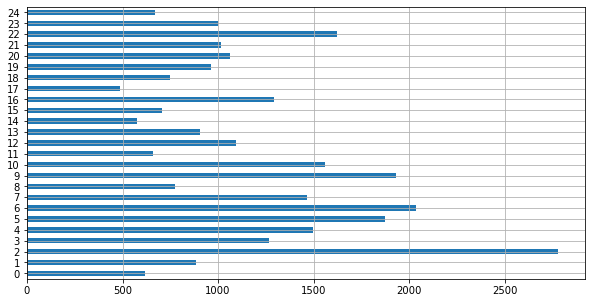

In [69]:
data_seoul['소계'].plot(kind='barh', grid = True, figsize=(10,5))
                         
plt.show()

In [70]:
data_seoul.head()

,구별,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,내국인비율,고령자비율
0,송파구,618,104.347826,667483,660584,6899,72506,1.033584,98.966416,10.862599
1,강서구,884,134.793814,603772,597248,6524,72548,1.080540,98.919460,12.015794
2,강남구,2780,150.619195,570500,565550,4950,63167,0.867660,99.132340,11.072217
3,노원구,1265,188.929889,569384,565565,3819,71941,0.670725,99.329275,12.634883
4,관악구,1496,149.290780,525515,507203,18312,68082,3.484582,96.515418,12.955291


In [71]:
# 인덱스 설정하기
data_seoul.set_index('구별', inplace=True)
data_seoul.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,내국인비율,고령자비율
구별,,,,,,,,,
송파구,618,104.347826,667483,660584,6899,72506,1.033584,98.966416,10.862599
강서구,884,134.793814,603772,597248,6524,72548,1.080540,98.919460,12.015794
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,99.132340,11.072217
노원구,1265,188.929889,569384,565565,3819,71941,0.670725,99.329275,12.634883
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,96.515418,12.955291


C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarni

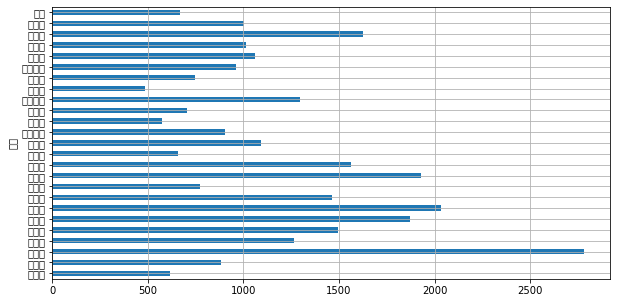

In [72]:
data_seoul['소계'].plot(kind='barh', grid = True, figsize=(10,5))
                         
plt.show()

In [74]:
# 차트 한글 표현을 위한 폰트 변경
import matplotlib.font_manager as fm    

fl = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family=fl)

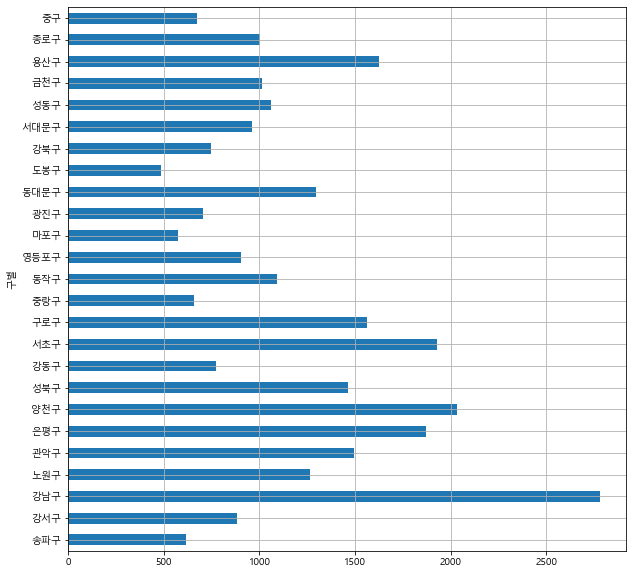

In [76]:
data_seoul['소계'].plot(kind='barh', grid = True, figsize=(10,10))
                         
plt.show()